## 2.1 분류(Clsassification)와 회귀(Regression)  
1. 분류  
a. 분류는 미리 정의된 가능성 있는 여러 클래스 레이블 중 하나를 예측  
b. 두 개의 클래스로 분류하는 건 이진 분류(binary classification), 셋 이상의 클래스로 분류하는 건 다중 분류(multiclass classification) 이라 함  

2. 회귀  
a. 연속적인 숫자(실수)를 예측  
b. 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측 또는 특정 농산물의 올 해 수확량 예측  
c. 분류문제와 달리 회귀문제에서는 출력값의 작은 차이는 문제가 되지 않음

In [1]:
# 분류와 회귀의 결과값의 작은 차이
# 1] 집값이 54000이 나왔는데, 예측이 53800이 나옴 -> 잘 예측한것
# 2] 0이 나와야 하는데, 1이 나옴 -> 망한것
# 이 차이를 말하는 것

## 2.2 일반화, 과대적합, 과소적합
- 지도학습에서 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 수 있음
- 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있다면 이를 훈련 세트에서 테스트 세트로 일반화(generalization)되었다고 함 (=모델을 잘 만들었다)
- (예를들어)보유하고 있는 모든 정보를 이용해 만든 복잡한 모델은 훈련 세트에만 최적화되어 새로운 데이터에 일반화 되기 어렵다. 이를 과대적합(overfitting)이라 함\
  ex) (45세 이상이고, 자녀가 셋 미만이고 이혼하지 않은 고객은 요트를 살 것이다.)  <-  잘못된 예측 -> 결과는 맞지만, 다른 요인이 있을것.
- 모델이 너무 간단하면 데이터의 다양성을 잡아내지 못하고 정확도도 떨어짐, 이를 과소적합(underfitting)이라 함 (집이 있는 사람은 모두 요트를 사려고 함)
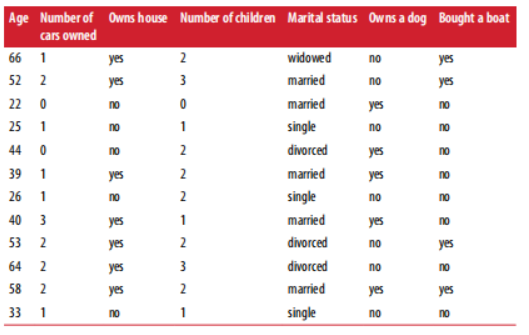
- 즉, 모델이란, 수학적 알고리즘의 표현식\
  (어떻게 하면 모델을 잘 만든거냐)
- 다음 그림과 같이 일반화 성능이 최대가 되는 최적점에 있는 모델을 찾아야 함

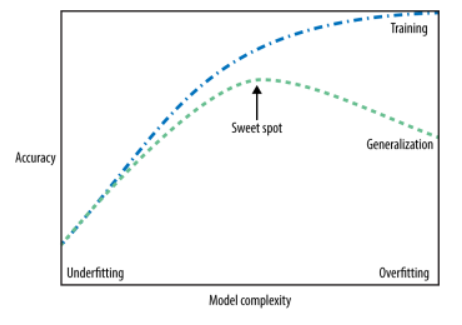

- Sweet spot -> 이부분에 맞추면 가장 모델을 잘 만들었다고 봄

- 데이터 세트에 다양한 데이터 포인트가 많을수록(feature의 수가 많을수록)과대적합 없이 더 복잡한 모델을 구축할 수 있음 (= 정확도를 향상시킬 수 있음)

In [3]:
# 과대적합은 훈련 데이터에는 높은 정확도를 가지지만, 테스트할때 정확도가 떨어짐
# 과소적합은 훈련, 테스트 둘 다에서 정확도가 떨어짐.

In [4]:
# 자 이제 본격적으로 지도학습에 대해 알아봅시다

### 2.3 지도 학습 알고리즘
1. 예제에 사용할 데이터 셋\
 a. forge 데이터셋은 인위적으로 만든 이진 분류 데이터셋 feature 2개, target 1
- x축은 첫 번째 특성, y축은 두 번째 특성으로 그래프 작성

In [5]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
print(X)
print(y)
# data는 feature가 2개임.
# 2진분류 -> [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]

# 알고리즘을 확인하기 위해 인위적으로 가공한 데이터

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


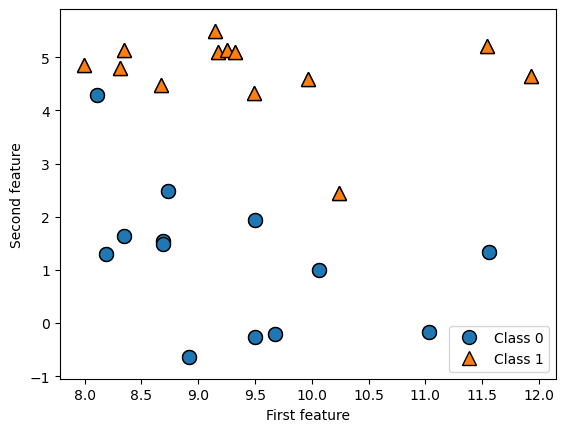

X.shape: (26, 2)


In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)  # 모든 row에 대해 0번째값, 1번째 값, y값
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print("X.shape:", X.shape)

# 이게 알고리즘에 쓸 forge data set

In [9]:
# 회귀문제는 따로 있음
# 회귀문제에는 따로 얘를 쓸 것

##### b. 회귀 알고리즘에는 인위적으로 만든 wave 데이터셋을 사용
- 입력 특성 한 개와 target 변수를 가짐
- 특성을 x축, target을 y축

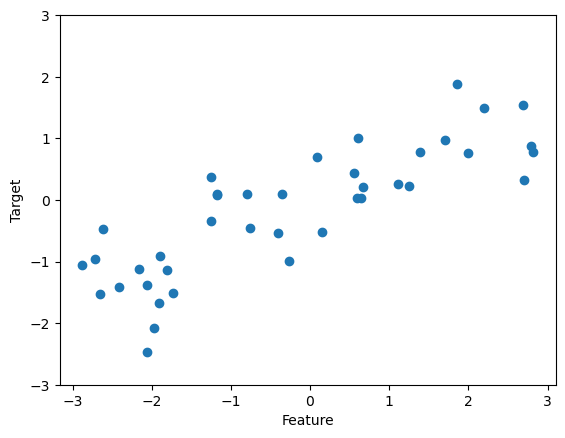

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [11]:
# 3번째는

c. scikit-learn 에 들어 있는 실제 데이터셋 사용
- 유방암 종양의 임상 데이터를 기록해 놓은 위스콘신 유방암 데이터 셋(cancer)
- 각 종양은 양성(benign)과 악성(malignant)로 레이블 되어 있음
- 조직 데이터를 기반으로 종양이 악성인지를 예측하도록 학습하는 것이 과제

In [12]:
# 그럼 실제로 위스콘신 데이터를 바꿔봅시다

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())  # 아까처럼 keys로 어떤 데이터인지 볼 수 있음

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
# data가 sample이 몇개인지 알 수 있음
print("유방암 데이터의 형태:", cancer.data.shape)
# 569의 sample, 30의 feature

유방암 데이터의 형태: (569, 30)


In [16]:
print("target_names:", cancer.target_names)

target_names: ['malignant' 'benign']


In [17]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
# 전체에서 악성, 비 악성은 몇개 있나 알아봅시다

In [22]:
import numpy as np
print("클래스별 샘플 수:\n{}".format({n: v for n, v in zip(cancer.target_names, 
                                                   np.bincount(cancer.target)) } ))
# bincount : 배열 내에 어떤게 있는지 count해주는것 -> zip해서 count함

클래스별 샘플 수:
{'malignant': 212, 'benign': 357}


In [25]:
# 30개의 feature가 있다고 했는데, 각 feature가 어떻게 생겼는지 한번 볼까요
print("feature names:\n{}".format(cancer.feature_names))
# 종양 관련된 얘기인거 같아. 잘은 모르지만

feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [26]:
# 데이터가 뭐가 있는지 한번 찍어보자
print(cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


d. 또 하나의 실제 데이터셋
- 보스턴 주택가격 데이터 셋
- 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해 1970년대 보스턴 주변의 주택 평균 가격을 예측
- 이 데이터 셋에는 샘플 506개 feature 13개

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape:", boston.data.shape)

shape: (506, 13)


In [29]:
# 특정 feature와 특정 feature가 연관되서 영향을 미치는 경우도 있음
# ex: 아이 2명, 집 구하기 -> 방 갯수, 범죄율, 학교가 근처인지
# 각각의 feature를 늘리는 방법
# ex: feature끼리 곱하는 방법
# 이러한 feature를 변형하는 방법을 -> feature engineering이라 함

- 이 데이터 셋에는 13개의 입력 fearture뿐 아니라, feature끼리 곱하여 의도적으로 확장
- 이러한 방법을 특성공학(feature engineering)이라 함

In [30]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)
# 샘플은 그대론데, feature수가 확장함

X.shape: (506, 104)


In [32]:
# 현재까지 4개의 예제를 봄
# 1. forge, 2. wave, 3. 유방암, 4. 주택가격

# 이제 실제적으로 한번 가봅시다

## 2.4 k-nn
a. k-Nearest Neighbors
- k-NN은 가장 가까운 훈련 데이터 샘플을 최근접 이웃으로 찾아 예측에 사용

C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


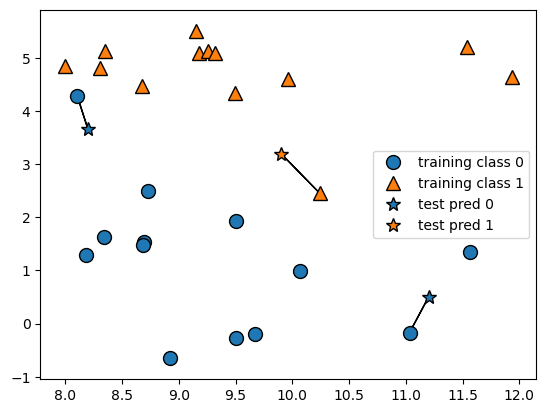

In [36]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

In [37]:
# 별 입장에선 각 선에 있는게 제일 가까운것 = 0으로 봄

# 만약 얘(n_neighbors)를 3개를 주면?

C:\Users\Administrator\anaconda3\envs\python-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


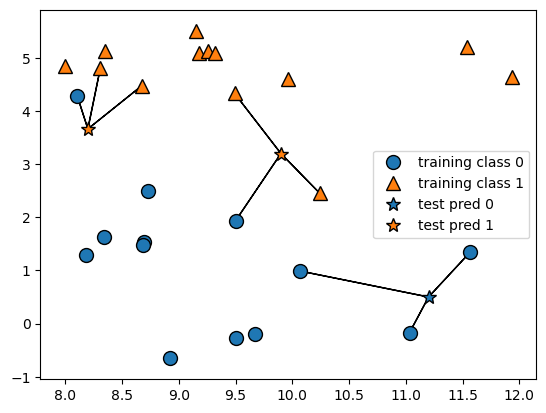

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

In [39]:
# 왼쪽 2개는 class1, 으론쪽에 파란색은 class 0 으로 판단
# n_neighbor를 몇개를 주느냐에 따라, 결과가 충분히 달라질 수 있음

- 최상단 샘플의 예측 결과가 달라짐
- scikit-learn을 사용하여 수행

In [43]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, random_state=0)
# 일단 forge dataset을 train과 test로 나눠봄

In [45]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [47]:
# 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [51]:
# 평가는 score로 함
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

# 0.86  -> 86%의 정확도가 나옴

Test set accuracy: 0.86


In [52]:
# 자 그럼 실제 이제 k-NN 알고리즘을
# 특성을 분석해보자

## KNeighborsClassifier 분석
- 2차원 데이터셋이므로 간으한 모든 테스트 포인트의 예측을 xy평면에 그려봄
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하여 결정 경계(decision boundary)를 확인함
- 다음은 이웃이 하나, 셋, 아홉 개일 때의 결정 경계를 보여줌

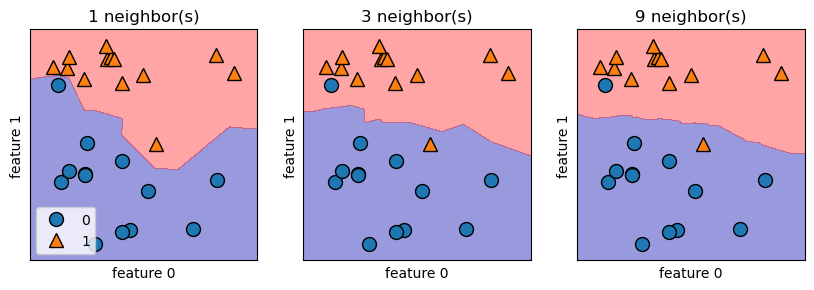

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

In [54]:
# neighbors를 1개 주고, 3, 9개 준것

- 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라감 (overfitting에 가까움)
- 이웃의 수를 늘릴 수록(오른쪽으로 갈 수록) 결정 경계는 더 부드러워짐, 부드러운 경계는 더 단순한(simple) 모델을 의미
- 결국, 이웃을 적게 사용하면 모델의 복잡도가 증가(Overfitting), 많이 사용하면 복잡도는 감소(Underfitting으로 갈 수 있음)
- 훈련 데이터 전체 수를 이웃의 수로 지정하는 극단적인 경우, 모든 테스트 포인트가 같은 이웃을 가지므로 테스트 포인트에 대한 예측은 모두 같은 값이 나옴
- 즉, 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨

- 모델의 복잡도와 일반화 사이의 관계를 입중해 봄
- 실제 데이터인 유방암 데이터셋을 사용
- 훈련 세트와 테스트 세트로 나눔
- 이웃의 수를 달리하면서 휸련 세트와 테스트 세트의 성능을 평가함

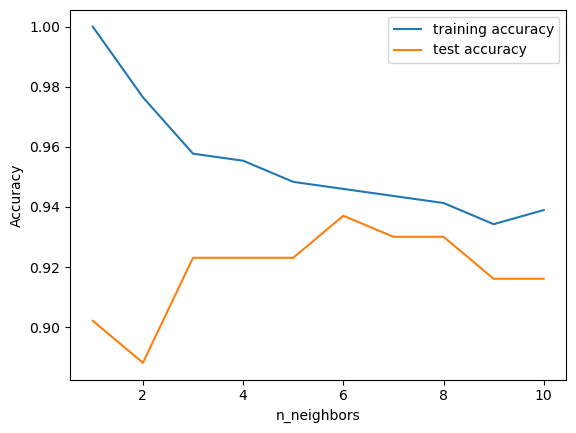

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = \
                    train_test_split(cancer.data, cancer.target,
                                    stratify=cancer.target, random_state=66)

# stratify => target의 비율을 유지한 상태로 계산하게 해줌 <- (?)
# 악성과 비악성이 1:9
# test는 9:1
# 일 경우 -> 망 -> 비율 맞춰주는게 stratify

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11) # neighbor를 1~10까지 줘서 어떻게 달라지는지 돌려볼 것

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # 그리고 학습
    clf.fit(X_train, y_train)
    # 학습하고 나온 결과를 각각 담자
    training_accuracy.append(clf.score(X_train, y_train)) # 훈련 세트에 대한 정확도
    # test set도 마찬가지
    test_accuracy.append(clf.score(X_test, y_test))
    
    # 이러면 list에 훈련, , 정확도가 쌓일 것
    
# 얘를 그려보면
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

- Overfitting(훈련할땐 정확도 높지만 test할땐 정확도가 떨어짐)과 Underfitting(훈련, test 둘다 정확도 떨어짐)의 특징을 잘 보여줌\
  왼쪽부분(0-2) 이 Overfitting <- 모델이 복잡함\
  오른쪽 부분(8-10)이 Underfitting  <-  모델이 단순함
- 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽
- 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 감소
- 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음
- 1-NN 이 모델을 너무 복잡하게 만든다는 것을 설명함 ( = Overfitting)
- 반면에, 10-NN은 모델이 너무 단순해서 정확도는 떨어짐 ( = Underfitting)


- 이웃이 6일때, k-NN을 사용할 때, 모델이 가장 적절하다고 볼 수 있다
- 정확도가 가장 좋을 때는 중간 정도인 6-NN 임

In [62]:
# 기계로도 악성이다 아니다를, 30개만 봤지만, 충분히 맞출 수 있다. 라는 것을 보여줌 (0.94) = 94%

### k-neighbors regression

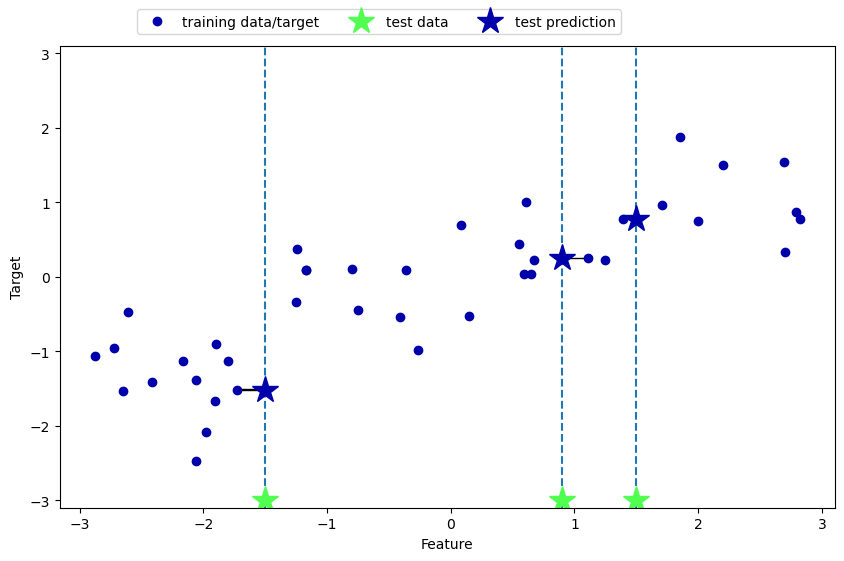

In [63]:
# 이웃이 하나일 경우 regression 하는 방법
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

In [64]:
# 파란 점이 훈련용 dataset이라고 치고, 녹색 별이 data를 넣어줬다고 치자.
# 걔의 y값으로 비교를 함 (?)

In [65]:
# 이웃을 3개를 넣어보자

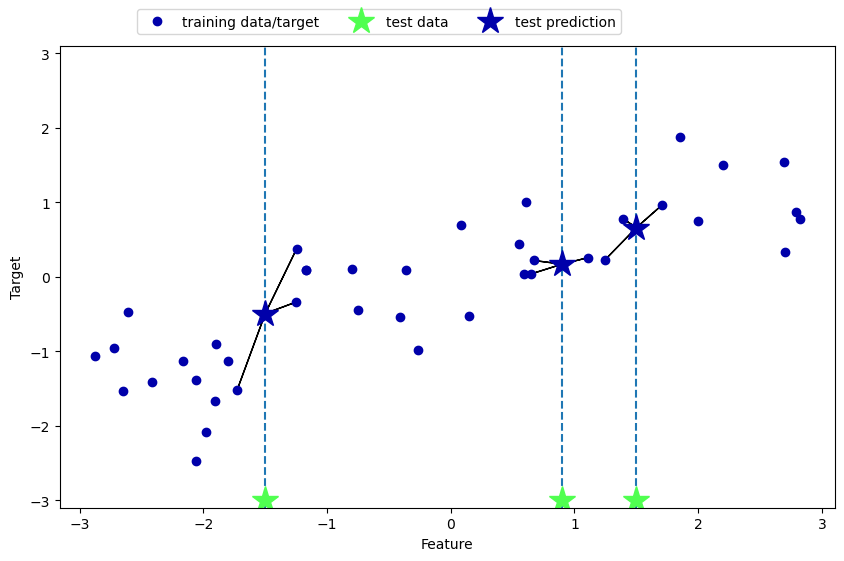

In [68]:
# 조건은 아까와 동일
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [67]:
# 3개니까 각각 더해서 나누기 3 해버린것.
# y값을 더한다음에 나누기 3

In [76]:
# scikit-learn으로 직접 한번 해보자
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)  # sample 수는 40개
# 얘를 train, test로 나눠야함
X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, random_state=0)
# 모델을 만듬
reg = KNeighborsRegressor(n_neighbors=3)

# 그 다음, 훈련시킴
reg.fit(X_train, y_train)
# 훈련 끝

KNeighborsRegressor(n_neighbors=3)

In [72]:
# 이상태에서 predict한 결과를 찍어봅시다.
print("Test set pridictions:\n", reg.predict(X_test))

Test set pridictions:
 [-1.23423166  0.18400081  0.49083154 -1.23423166  1.06165975  1.0717713
  0.230253    0.230253   -1.23751806 -0.65851598]


In [78]:
# score 함수로 평가해 봅시다
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

# 위에서 random_state=0)  가 66이었는데, 너무 낮아서 0으로 바꿨더니 올라갔음.

Test set score: 0.83


- 이 메서드는 회귀일 땐 R<sup>2</sup> 값을 반환 : R<sup>2</sup> = 1 - ( sigma(y-예측값)<sup>2</sup> / sigma(y-평균)<sup>2</sup> )  
- 결정 계수라고도 하는 R<sup>2</sup> 값은 회귀 모델에서 예측의 적합도를 측정한 값, 보통 0과 1사이의 값
- (숫자의 의미는)1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균만으로만 예측하는 모델의 경우 = 예측값이 \
 정확히 예측하지 못하고 평균값 정도로만 예측한다는 것 -> 분모=분자 => 1
- R<sup>2</sup> 은 음수가 될 수도 있음, 이 때는 예측과 target이 상반된 경향을 가지는 경우

In [80]:
# R0값은 이렇게 구함
# (0.83 정도면 잘 맞아 떨어진 것)

### KNeighborsRegression 분석
- 1차원 데이터셋에 대한 가능한 모든 특성 값을 만들어 예측해 볼 수 있음
- 이를 위해 x 축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듦

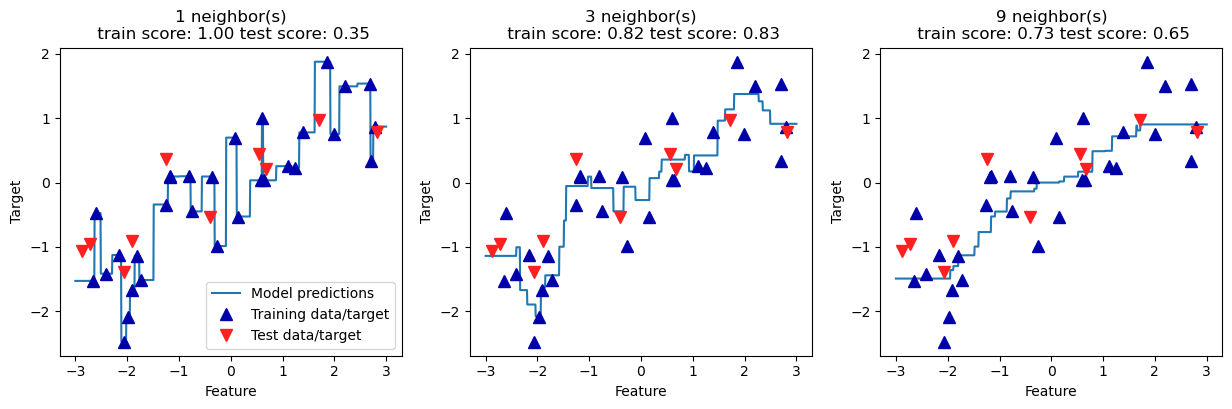

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)  # ^ -> 훈련용
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   #  v => test 용
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

In [83]:
# 왼쪽건 neighbor가 1일때는 1지만, score는 0.35밖에 안나옴  =>  Overfitting  ,  model 복잡도는 높음
# 오른쪽은, Underfitting

- 이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나감
- 이는 매우 불안정한 예측을 만들어 냄
- 하지만 이웃을 많이 사용하면(증가시키면) 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정적인 예측을 얻음

In [84]:
# 참고로 위와같은 설명부분에서 시험 다 나옴

In [85]:
# 최종 결론. (여기서도 시험문제 1,2개 나올듯)

### 장단점과 매개변수
- 일반적으로 KNeighbors 분류기에 중요한 매개변수 두 개, 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수
- 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 동작하지만, 이 매개변수는 잘 조정해야 함
- 거리 재는 방법을 고르는 문제는 또 다른 문제, 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용(metric 매개변수를 사용하여 거리 측정 방식을 변경할 수 있음)
- k-NN 의 장점은 이해하기 매우 쉬운 모델, 많은 조정 필요없이 자주 좋은 성능을 발휘
- 더 복잡한 알고리즘을 적용하기 전에 시도해볼 수 있는 좋은 시작점
- 문제점 : 훈련중 셈플수가 너무 많으면 = 훈련 세트가 매우 크면, 예측이 느려짐\
(모든 훈련 포인트를 다 계산해서 거리를 계산해야 하므로 당연히 느려짐)
- k-NN 알고리즘을 사용할 때는 데이터 전처리가 매우 중요(모든 특성값들이 같은 스케일을 갖도록 정규화하는 것이 일반적)
- 수백 개 이상의 많은 feature를 가진 데이터셋에는 잘 동작하지 않음
- 결론 : k-NN 알고리즘이 이해하긴 쉽지만, 예측이 느리고 많은 feature를 처리하는 능력이 부족해 현업에서는 잘 쓰지 않음

In [86]:
# 그래서 이런 문제를 극복하기 위해, 선형 모델 알고리즘들이 나오기 시작함

# 선형 모델 알고리즘으로 넘어가 보자.